# ASSOCIATION RULES

## The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.

## Data Preprocessing:

In [1]:
!pip install mlxtend

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [50]:
df=pd.read_excel("Online_retail[1].xlsx",header=None)
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [51]:
df.shape

(7501, 1)

In [52]:
df.isnull().sum()

0    0
dtype: int64

In [53]:
df.duplicated().sum()

np.int64(2325)

In [56]:
df[0].unique()

array(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil',
       'burgers,meatballs,eggs', 'chutney', ...,
       'butter,light mayo,fresh bread',
       'burgers,frozen vegetables,eggs,french fries,magazines,green tea',
       'eggs,frozen smoothie,yogurt cake,low fat yogurt'], dtype=object)

In [57]:
df.describe()

,0
count,7501
unique,5176
top,cookies
freq,223


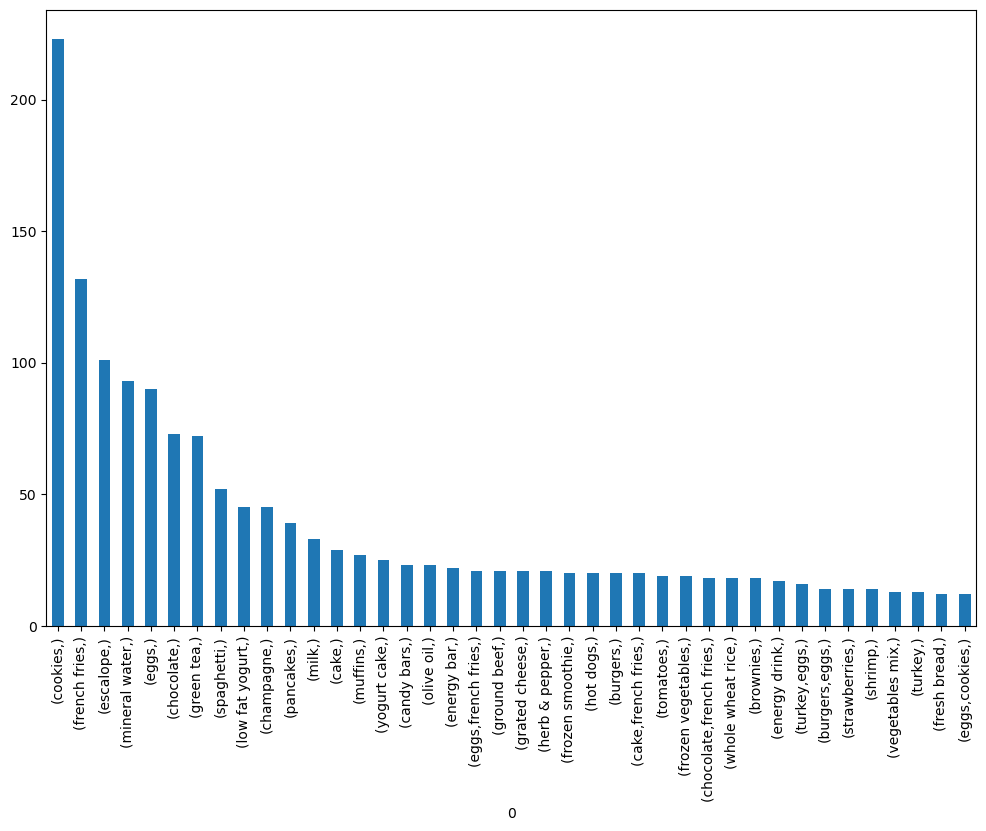

In [58]:
plt.figure(figsize=(12,8))
df.value_counts().head(40).plot(kind="bar")
plt.show()

In [59]:
len(df)

7501

In [60]:
transactions = []
for i in range(len(df)):
    items = df.iloc[i][0].split(",")   
    items = [x.strip() for x in items] 
    transactions.append(items)

In [61]:
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

### preprocessing

In [67]:
one_enc=TransactionEncoder()
data=one_enc.fit_transform(transactions)
data

array([[ True,  True, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [69]:
data1=pd.DataFrame(data,columns=one_enc.columns_)
data1

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
data1.shape

(7501, 119)

In [72]:
frq_pat=apriori(data1,min_support=0.05,use_colnames=True)
frq_pat

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


## Association Rule

In [74]:
rules=association_rules(frq_pat,metric='confidence',min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796


## Interview Questions:

### 1.What is lift and why is it important in Association rules?
### Ans:Lift is a measure used in association rule mining to evaluate the strength of an association rule compared to the expected likelihood of the items being associated if they were independent. In simpler terms, lift tells you how much more likely the items in the rule are to occur together than would be expected by chance.

### 2.	What is support and Confidence. How do you calculate them?
### 1. Support
### Support measures how frequently an itemset appears in the dataset. It helps to identify how common or rare an itemset is.
### Support of an itemset A is defined as the proportion of transactions in the dataset that contain the itemset A
### 2.Confidence measures the likelihood that itemset 
### B is purchased when itemset 𝐴 is purchased. It evaluates the reliability of the rule A→𝐵

